# El método de Newton

Implementaremos el Método de Newton para minimizar la función

$$f(x, y)=100(y-x^2)^2+(1-x)^2$$

En primer lugar implementamos la función, su gradiente y su Hessiano

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def gradiente(x):
  fx=-400*(x[1]-x[0]**2)*x[0]+2*x[0]-2
  fy=200*(x[1]-x[0]**2)
  return np.array([fx, fy])

def hessiano(x):
  fxx=-400*(x[1]-x[0]**2)+800*x[0]**2+2
  fxy=-400*x[0]
  fyy=200
  return np.matrix([[fxx, fxy], [fxy, fyy]])

Luego implementamos el método:

$$\mathbf{x}_{k+1}=\mathbf{x}_k-Hf(\mathbf{x}_k)^{-1}\nabla f(\mathbf{x}_k)$$

Añadimos un parámetro que nos indique si queremos obtener la gráfica

In [ ]:

def Newton(x0, gradiente, matriz_hessiana, epsilon, max_iter, grafica=True):
  # x0: punto inicial dado por una lista --> matriz fila
  # gradiente de la función --> en forma de matriz fila
  # matriz Hessiana de la función
  # epsilon: tolerancia
  # max_iter: máximo de iteraciones
  # grafica: booleano para saber si graficar

  tol=epsilon+1

  iter=0

  valores=[f(x0)]

  while(tol>epsilon):


    # direccion de movimiento
    p=np.matmul(gradiente(x0), np.linalg.inv(matriz_hessiana(x0)))

    # actualización del punto
    x0=x0-np.array(p).flatten()

    tol=np.linalg.norm(p)

    iter+=1

    valores.append(f(x0))

    if (iter>=max_iter):
      print("El algoritmo no convergión en ", iter, "iteraciones")
      break

  if (grafica==True):
      plt.plot(valores)
      plt.show()

  return x0, iter




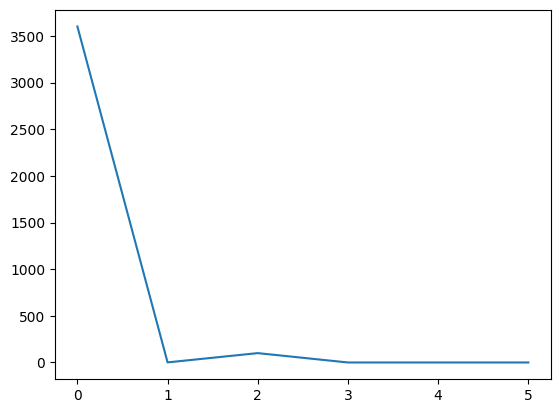

(array([1., 1.]), 5)


In [ ]:
x0=np.array([2,10])
solucion=Newton(x0, gradiente, hessiano, epsilon=10**-6, max_iter=10**3, grafica=True)
print(solucion)

In [ ]:
x0=np.array([2, 2])
p=np.matmul(gradiente(x0), np.linalg.inv(hessiano(x0)))
np.linalg.norm(p)

1.9900265001650128

In [ ]:
3*np.eye(2)

array([[3., 0.],
       [0., 3.]])

# Inclusión de un tamaño de paso

$$\mathbf{x}_{k+1}=\mathbf{x}_k-\alpha Hf(\mathbf{x}_k)^{-1}\nabla f(\mathbf{x}_k),$$

donde $\alpha$ es el tamaño de paso.

# Modificación de Levenberg-Marquardt

$$\mathbf{x}_{k+1}=\mathbf{x}_k-\alpha [Hf(\mathbf{x}_k)+\mu I]^{-1}\nabla f(\mathbf{x}_k),$$
donde $\alpha$ y $\mu$ son constantes.

**Ejercicio 1:**

Trabaja en grupos

1. Implementa el algoritmo del Método de Newton con tamaño de paso constante.
2. Implementa la modificación de Levenberg-Marquardt con un valor de $\mu$ constante.
3. Utiliza los algoritmos para encontrar el mínimo de la función $f$ definida arriba. Indica el número de pasos que se necesitaron y realiza plots de los valores de la función con respecto al número de iteraciones.